##seconda parte 

Il file halo-catalog.fit contiene i profili di densità di 40103 aloni di materia oscura
estratti da una simulazione cosmologica N-body, il loro redshift, e la ricchezza, una
somma pesata del numero di galassie che popolano l'alone e che funge da per la
massa. I nomi delle colonne contenenti i dati sono rispettivamente: redshift='Z',
ricchezza='LAMBDA_TR', profilo densità='SIGMA_of_R'.
I valori di in Mpc a cui sono calcolati i profili di densità si trovano nel file R_values.npy

In [ ]:
Prima richiesta: suddividere il catalogo in 5 intervalli di ricchezza e calcolare il redshift,
profilo di densitá medio e la sua deviazione standard in funzione di R.
Mostrare poi i risultati in un grafico con 5 pannelli.

In [4]:
#importo un blocco di librerie
import numpy as np
import math
import matplotlib.pyplot as plt
from astropy.io import fits
import scipy.stats as stats
import matplotlib.axes as axes


In [59]:
from astropy.table import Table

# Carica il file FITS
tabella = Table.read('halo_catalog.fit')
R_values = np.load('R_values.npy')

#print (R_values) lo avevo fatto per vedere quanti valori avessi
# Definisci gli intervalli per la colonna LAMBDA_TR
intervalli_lambda = [15, 20, 30, 45, 60, 200]

#print(tabella['SIGMA_of_R']) 
#valore_prima_riga = tabella['SIGMA_of_R'][0] #volevo vedere se il numero corrispondeva 
                                              #al numero di valori di R
#print(valore_prima_riga)
#print("\n")
    

# Inizializza le liste vuote per contenere i dati suddivisi
dati_divisi = []
redshift_medi = []
sigma_medi = []
deviazione_standard = []
sigma_var=[]
#for i in range(len(intervalli_lambda) - 1):volevo essere sicura di prendere intervalli giusti
    #print(i)
    
#print (tabella)
# Dividi i dati in base agli intervalli di LAMBDA_TR
for i in range(len(intervalli_lambda) - 1):
    lower_bound = intervalli_lambda[i]
    upper_bound = intervalli_lambda[i + 1]
    
    # Seleziona i dati all'interno dell'intervallo corrente
    dati_intervallo = tabella[(tabella['LAMBDA_TR'] >= lower_bound) & (tabella['LAMBDA_TR'] < upper_bound)]
    
    # Calcola il redshift medio per l'intervallo corrente
    redshift_medio = dati_intervallo['Z'].mean()
    redshift_medi.append(redshift_medio)
    
    # Calcola il valore medio della colonna SIGMA_of_R per l'intervallo corrente
    
    colonne_sigma = np.vstack(dati_intervallo['SIGMA_of_R'])
    valori_medisigma = np.mean(colonne_sigma, axis=0)
    sigma_medi.append(valori_medisigma)
    
    valori_std = np.std(colonne_sigma, axis=0)
    sigma_var.append(valori_std)
   
    
    print("Intervallo di richezza:", lower_bound, "-", upper_bound)
    print ("Valori medi di densitaà:",valori_medisigma)
    print("Redshift medio:", redshift_medio)
    print ("valori delle deviazioni standard:",valori_std)
    print("\n")
  
   

    
    

Intervallo di richezza: 15 - 20
Valori medi di densitaà: [6.0403742e+14 4.9004597e+14 3.5989581e+14 2.4418617e+14 1.5731492e+14
 9.9407714e+13 6.3265539e+13 4.2587604e+13]
Redshift medio: 0.46009004
valori delle deviazioni standard: [2.6402263e+14 1.8936570e+14 1.2902464e+14 8.4269288e+13 5.4937648e+13
 3.6740123e+13 2.5819787e+13 1.8946961e+13]


Intervallo di richezza: 20 - 30
Valori medi di densitaà: [6.71748119e+14 5.49872449e+14 4.07836975e+14 2.78087908e+14
 1.79839928e+14 1.13148976e+14 7.07332627e+13 4.62313887e+13]
Redshift medio: 0.4638874
valori delle deviazioni standard: [2.9098679e+14 2.1585170e+14 1.5034023e+14 9.8903861e+13 6.3344464e+13
 4.0867738e+13 2.7332977e+13 1.9252921e+13]


Intervallo di richezza: 30 - 45
Valori medi di densitaà: [8.3223823e+14 6.8750682e+14 5.1643707e+14 3.5783537e+14 2.3459279e+14
 1.4806130e+14 9.0848826e+13 5.6035906e+13]
Redshift medio: 0.45920765
valori delle deviazioni standard: [3.5774158e+14 2.7179429e+14 1.9217449e+14 1.2874557e+14 8.2

Intervallo di ricchezza: 15 - 20
valori di R= [0.04056329 0.06397266 0.10089175 0.15911711 0.25094477 0.39576683
 0.62416676 0.98437798]
valori medi= [6.0403742e+14 4.9004597e+14 3.5989581e+14 2.4418617e+14 1.5731492e+14
 9.9407714e+13 6.3265539e+13 4.2587604e+13]
deviazioni standard= [2.6402263e+14 1.8936570e+14 1.2902464e+14 8.4269288e+13 5.4937648e+13
 3.6740123e+13 2.5819787e+13 1.8946961e+13]




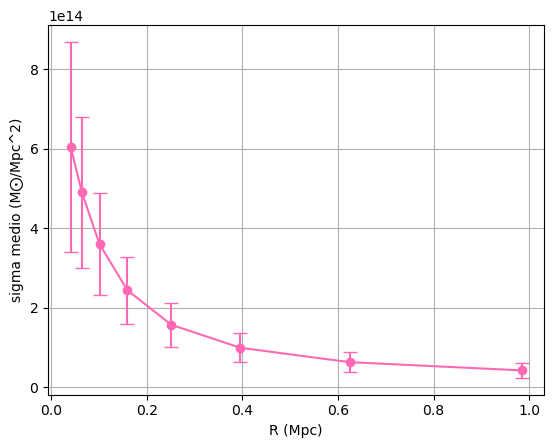

Intervallo di ricchezza: 20 - 30
valori di R= [0.04056329 0.06397266 0.10089175 0.15911711 0.25094477 0.39576683
 0.62416676 0.98437798]
valori medi= [6.71748119e+14 5.49872449e+14 4.07836975e+14 2.78087908e+14
 1.79839928e+14 1.13148976e+14 7.07332627e+13 4.62313887e+13]
deviazioni standard= [2.9098679e+14 2.1585170e+14 1.5034023e+14 9.8903861e+13 6.3344464e+13
 4.0867738e+13 2.7332977e+13 1.9252921e+13]




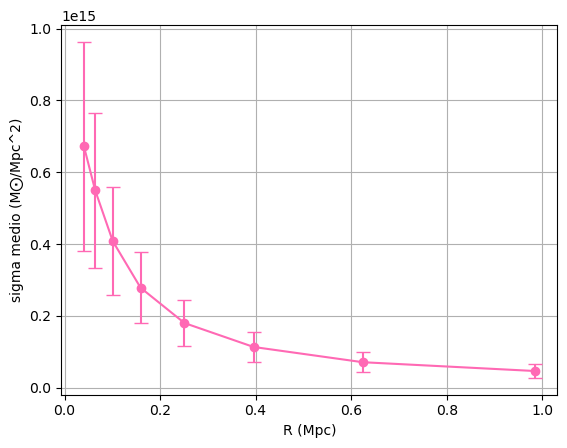

Intervallo di ricchezza: 30 - 45
valori di R= [0.04056329 0.06397266 0.10089175 0.15911711 0.25094477 0.39576683
 0.62416676 0.98437798]
valori medi= [8.3223823e+14 6.8750682e+14 5.1643707e+14 3.5783537e+14 2.3459279e+14
 1.4806130e+14 9.0848826e+13 5.6035906e+13]
deviazioni standard= [3.5774158e+14 2.7179429e+14 1.9217449e+14 1.2874557e+14 8.2860271e+13
 5.2355551e+13 3.3070846e+13 2.1674290e+13]




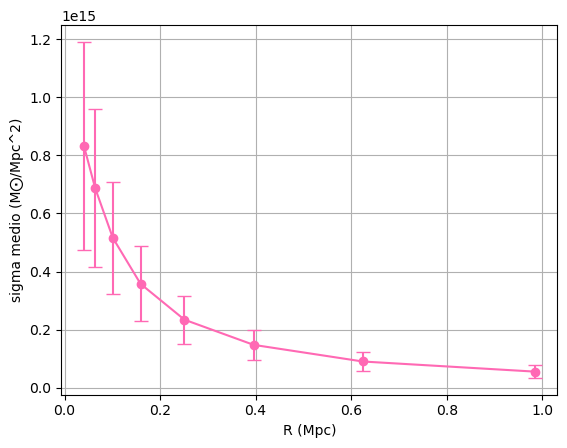

Intervallo di ricchezza: 45 - 60
valori di R= [0.04056329 0.06397266 0.10089175 0.15911711 0.25094477 0.39576683
 0.62416676 0.98437798]
valori medi= [1.0174872e+15 8.4818611e+14 6.4939624e+14 4.5753082e+14 3.0308037e+14
 1.9181173e+14 1.1664622e+14 6.9855886e+13]
deviazioni standard= [4.3137246e+14 3.3469606e+14 2.3912427e+14 1.6054286e+14 1.0203266e+14
 6.2538989e+13 3.8361851e+13 2.4727314e+13]




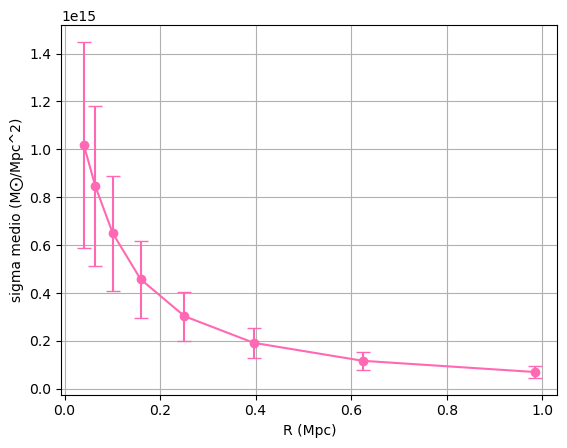

Intervallo di ricchezza: 60 - 200
valori di R= [0.04056329 0.06397266 0.10089175 0.15911711 0.25094477 0.39576683
 0.62416676 0.98437798]
valori medi= [1.29928277e+15 1.09272685e+15 8.50340979e+14 6.10190097e+14
 4.14355930e+14 2.67332539e+14 1.63904693e+14 9.58119711e+13]
deviazioni standard= [5.5879685e+14 4.4372455e+14 3.3487286e+14 2.3180977e+14 1.5435745e+14
 9.9830039e+13 6.1935601e+13 3.7852058e+13]




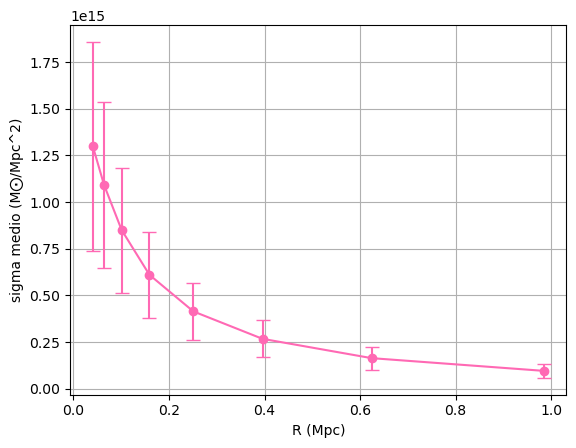

In [60]:
#qua è la parte doce faccio i grafici.

for i in range(len(intervalli_lambda) - 1):
    print("Intervallo di ricchezza:", intervalli_lambda[i], "-", intervalli_lambda[i+1])
    # Valori medi di sigma_r per l'intervallo corrente
    valori_medi = sigma_medi[i]
    deviazioni_std = sigma_var[i]
    
    print("valori di R=",R_values)
    print("valori medi=",valori_medi)
    print("deviazioni standard=",deviazioni_std) 
    print("\n")
   
    plt.errorbar(R_values, valori_medi, yerr=deviazioni_std, fmt='o-', capsize=5,color='hotpink')
    plt.xlabel('R (Mpc)')  # Aggiungi etichetta e unità di misura per l'asse x
    plt.ylabel('sigma medio (M⨀/Mpc^2)')
    plt.grid(True)
    plt.show()
 


La prima cose che si nota osservando questi 5 grafici (ognuno rappresentate un intervallo di ricchezza) è che la barra relativa all'errore diminuisce all'aumentare del raggio; questo implica che per valori grandi di R si ha che in ogni gruppo la densità è abbastanza coerente tra le diverse osservazioni e, viceversa, che per valori di R piccoli le fluttuazioni saranno piu ampie.
Notiamo inoltre che per ogni grafico la curva della densità è decrescente e che la ripididità diminuisce all'aumentare del raggio fino a diventare quasi orizzontale.
Queste osservazioni fanno capire che in generale la densita media diminuisce con l'aumentare del raggio e tenderà a rimanere costante per raggi grandi.
Per avere maggiori informazioni su come varia questa pendenza aggiungo qualche linea di codice per vedere,per ogni intervallo, come varia la pendenza tra un valore medio e quello successivo.

In [71]:

for i in range(len(intervalli_lambda) - 1):
    print("Intervallo di ricchezza:", intervalli_lambda[i], "-", intervalli_lambda[i+1])
    
    # Valori medi di sigma_r per l'intervallo corrente
    valori_medi = sigma_medi[i]
    R_values = np.load('R_values.npy')
    
    # Calcoliamo la pendenza tra ogni coppia di punti consecutivi
    pendenze = np.diff(valori_medi) / np.diff(R_values)
    
    # Stampa le pendenze tra i punti per il controllo
    print("Pendenze tra i punti:", pendenze)
    print()
    


Intervallo di ricchezza: 15 - 20
Pendenze tra i punti: [-4.86947961e+15 -3.52528084e+15 -1.98727199e+15 -9.46024951e+14
 -3.99850726e+14 -1.58240740e+14 -5.74050302e+13]

Intervallo di ricchezza: 20 - 30
Pendenze tra i punti: [-5.20627713e+15 -3.84720957e+15 -2.22839415e+15 -1.06991716e+15
 -4.60502707e+14 -1.85708077e+14 -6.80208535e+13]

Intervallo di ricchezza: 30 - 45
Pendenze tra i punti: [-6.18262699e+15 -4.63363960e+15 -2.72392790e+15 -1.34210746e+15
 -5.97502156e+14 -2.50492500e+14 -9.66458544e+13]

Intervallo di ricchezza: 45 - 60
Pendenze tra i punti: [-7.23219371e+15 -5.38447398e+15 -3.29522042e+15 -1.68196010e+15
 -7.68312797e+14 -3.29096019e+14 -1.29896940e+14]

Intervallo di ricchezza: 60 - 200
Pendenze tra i punti: [-8.82364252e+15 -6.56532646e+15 -4.12450614e+15 -2.13262741e+15
 -1.01520023e+15 -4.52836579e+14 -1.89035543e+14]



Infine, paragonando i grafici relativi ai vari gruppi, possiamo affermare che vi è una certa coerenza nella distribuzione di densità tra i gruppi, poiché nell'insieme appaiono molto simili tra di loro.